Sofía Espinosa Jaramillo

# Medidas de desempeño

### En esta Clase vamos a repasar, de manera práctica, los conceptos de medidas de desempeño

#### Tiempos de ejecución
Es la métrica más sencilla, solo tenemos que calcular el tiempo desde que empieza a correr el programa hasta que termina.

In [1]:
import time

def funcion(tiempo: int):
  time.sleep(tiempo)


inicio = time.time()
funcion(10)
fin = time.time()

print(f"El tiempo de ejecución del código es de {fin- inicio}")
# Podemos notar que el tiempo de ejecución es diferente a los que podríamos suponer.
# Aunque la funcion se va a dormir por 10 segundos, el programa tarda un tiempo más en enviar las instrucciones a la ALU para hacer el proceso.

El tiempo de ejecución del código es de 10.000361680984497


#### Aceleración

Esta métrica mide la rapidéz con la que se ejecuta un algoritmo paralelo respecto a como se haría en  (1 procesador).

Si tenemos un algoritmo que emplea 60 segundos en completar su ejecución con un solo procesador, cuanto es la aceleración del algoritmo si con 4 procesadores la realiza en 20 segundos.

In [2]:
t_1 = 60
t_4 = 20

Aceleracion = 60/20
print(f" La aceleración es de {Aceleracion} veces")
#La aceleración de un algoritmo es adimensional

 La aceleración es de 3.0 veces


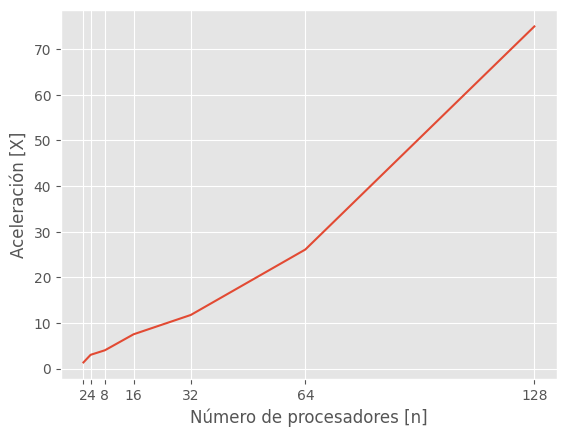

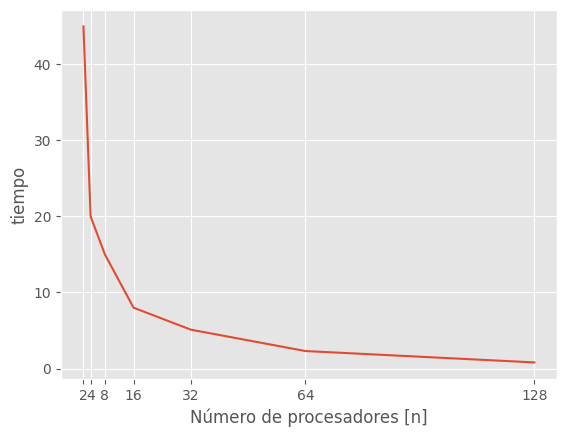

In [3]:
# Si tenemos los tiempos del algoritmo, ejecutado con diferentes procesadores
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

n_cores = np.array([2,4,8,16,32,64,128])
t_paralelo = np.array([45,20,15,8,5.11,2.3,0.8])

# Miremos gráficamente el comportamiento.

acel = t_1 / t_paralelo
plt.plot(n_cores, acel)
plt.xticks(n_cores);
plt.ylabel("Aceleración [X]");
plt.xlabel("Número de procesadores [n]");

plt.figure()
plt.plot(n_cores, t_paralelo)
plt.xticks(n_cores);
plt.ylabel("tiempo");
plt.xlabel("Número de procesadores [n]");


### Eficiencia

Supongamos que tenemos un problema que se puede resolver en 100 segundos con un algoritmo secuencial. Queremos resolver el mismo problema utilizando un algoritmo paralelo en una computadora con 4 procesadores. Ejecutamos el algoritmo paralelo y medimos que tarda 25 segundos en completar.

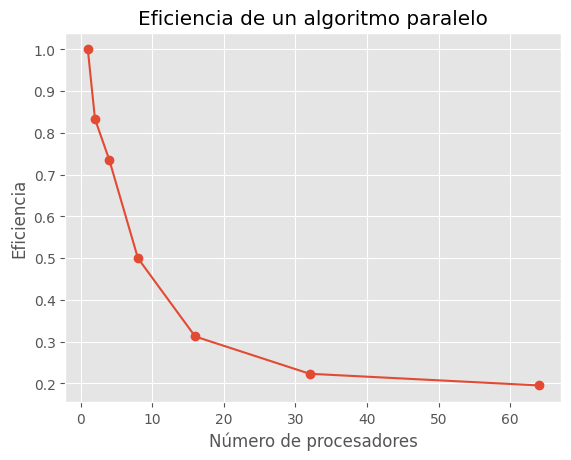

In [4]:
import numpy as np

t_secuencial = 100
t_para = [100,60,34,25,20,14,8]

proc = np.array([1,2,4,8,16,32,64])

eficiencia = t_secuencial /(proc * t_para) ## Esta se deduce de la ecn de aceleración y eficiencia.


plt.plot(proc,eficiencia,'-o')
plt.xlabel('Número de procesadores')
plt.ylabel('Eficiencia')
plt.title('Eficiencia de un algoritmo paralelo')
plt.show()

### Ley de Amdahl

supongamos que tenemos un programa secuencial que tarda 1 hora en completarse, y que podemos paralelizar el 50% del código. Es decir, la mitad del programa se puede ejecutar en paralelo, mientras que la otra mitad sigue siendo secuencial. Si tenemos 8 procesadores disponibles para ejecutar el programa en paralelo, ¿cuál sería el tiempo de ejecución?

Para responder a esta pregunta, podemos utilizar la Ley de Amdahl y la siguiente fórmula:

\begin{align}{
  {\huge Acel = \frac{1}{f_s + (\frac{f_p}{N})}}
  }\end{align}

* Acá $f_s$ es la fracción secuencial
* Acá $f_p$ es la fracción paralela
* Acá $N$ es la cantidad de procesadores


In [5]:
N = 8
frac_ser = 0.5
frac_par = 1 - frac_ser

acel = 1/(frac_ser +(frac_par/N))
acel

1.7777777777777777

In [6]:
#s=ts/tp;
#tp=ts/s
tp=60/1.7777
tp

33.751476627102434

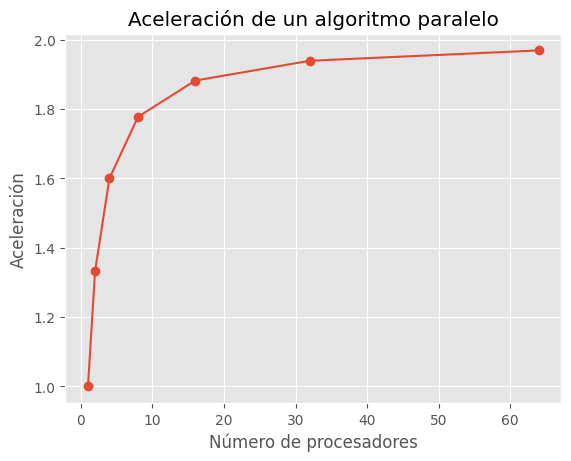

In [7]:
## Ahora miremos el desempeño del algoritmo variando el número de procesadores
import numpy as np

N = np.array([1,2,4,8,16,32,64])
frac_ser = 0.5
frac_par = 1 - frac_ser


acel = 1/(frac_ser +(frac_par/N))

plt.plot(N,acel,'-o')
plt.xlabel('Número de procesadores')
plt.ylabel('Aceleración')
plt.title('Aceleración de un algoritmo paralelo')
plt.show()

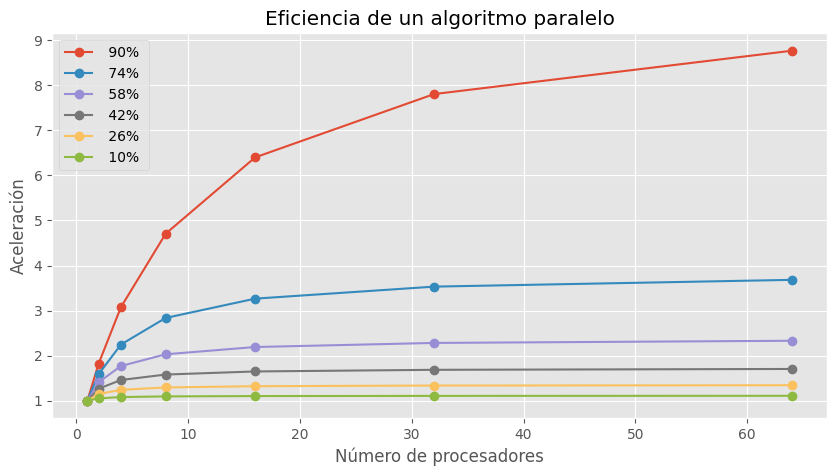

In [8]:
# Miremos ahora si también se modifica el porcentaje de paralelización

N = np.array([1,2,4,8,16,32,64])
frac_sers = np.linspace(0.1, 0.9, 6)

plt.figure(figsize=(10,5))
for frac_ser in frac_sers:
  frac_par = 1 - frac_ser
  acel = 1/(frac_ser +(frac_par/N))
  plt.plot(N,acel,'-o',label=' {:.0f}% '.format(frac_par*100))

plt.xlabel('Número de procesadores')
plt.ylabel('Aceleración')
plt.title('Eficiencia de un algoritmo paralelo')
plt.legend()
plt.show()

### Ley de Gustafson

Establece que cualquier problema suficientemente grande puede ser eficientemente paralelizado, ofrece un nuevo punto de vista y así una visión positiva de las ventajas del procesamiento paralelo.
La ecuación $s$ se define de la siguiente manera:

$$
s = f + N(1 - f) = N - fx(N - 1)
$$

Donde:
- $f$ es el porcentaje en decimales de la parte secuencial.
- $N$ es la cantidad de procesadores.


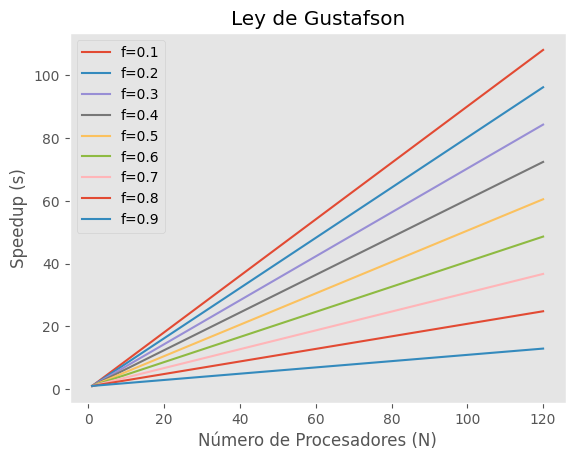

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Valores de N (número de procesadores) de 1 a 120
N = np.arange(1, 121)

# Valores de f (fracción secuencial) desde 0.1 hasta 0.9
f_values = np.linspace(0.1, 0.9, 9)

# Crear un gráfico para cada valor de f
for f in f_values:
    speedup = N - f * (N - 1)
    plt.plot(N, speedup, label=f'f={f:.1f}')

# Configurar el gráfico
plt.xlabel('Número de Procesadores (N)')
plt.ylabel('Speedup (s)')
plt.title('Ley de Gustafson')
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.show()


### Ejercicio

Establezca el porcentaje de paralelización de un algoritmo que tiene:

* Aceleración = 2.3 X
* Procesadores = 12

Pista: Utilice la Ley de Amdahl

In [10]:
from sympy import symbols, Eq, solve

# Datos
Acel = 2.3
N = 12
fp = symbols('fp')

# Ecuación basada en la Ley de Amdahl
equation = Eq(1/Acel, (1 - fp) + (fp / N))

# Resolver para fp
solution = solve(equation, fp)
fp_value = solution[0] * 100  # Convertir a porcentaje

print(f"El porcentaje de paralelización es aproximadamente {fp_value:.2f}%")


El porcentaje de paralelización es aproximadamente 61.66%


### Ejercicio de Aceleraciones

In [19]:
#@title Ejecute la siguente celda para importar los insumos del ejercicio
import time
t_secuencial = 60 #@param
t_paralelo = 5 #@param
t_exportdata = 3 #@param
def leerdata():
  time.sleep(1)

def asignarMemoria():
  time.sleep(1)

def copiarDatos():
  time.sleep(1)

def kernelSecuencial(t:int=t_secuencial):
  time.sleep(t)

def kernelParalelo(t:int=t_paralelo):
  time.sleep(t)

def exportarDatos(t:int=t_exportdata):
  time.sleep(t)

def liberarMemoria():
  time.sleep(1)


Un proceso a bajo nivel de paralelización de un proceso consta de varias etapas en el siguiente orden:

* Leer data en RAM de CPU
* Asignar memoria en la GPU
* Copiar datos de la RAM de CPU a RAM de GPU y cache
* Ejecución de la tarea (paralelo o serial)
* Exportar datos de la GPU a la CPU
* Liberar memoria


Simulemos un proceso secuencial y un programa paralelizado

para eso pueden usar las siguientes funciones:



```
* leerdata()
* asignarMemoria()
* copiarDatos()
* kernelSecuencial()
* kernelParalelo()
* exportarDatos()
* liberarMemoria()
```
Teniendo estas funciones, arme dos casos, un proceso secuencial y un proceso paralelizado; luego realice la medición de los "*breakdowns*" y tiempos de ejecución del kernel.

1. Calcule la aceleración del programa paralelizado respecto al secuencial.
2. Calcule la fracción de código paralelo y no paralelo con respecto al tiempo.
3. Analice el comportamiento de la aceleración de todo el programa o de solo la parte de kernel. ¿Vale la pena la paralelización?

4. Vaya al formulario y multiplique el "*t_exportdata*" por 60. Realice los pasos anteriores en otra celda, analice los cambios y concluya sobre los resultados





In [24]:
### parte 1,2,3 - TU CÓDIGO VA ACÁ
import time

# Tiempos de ejecución
t_secuencial = 60  # Tiempo de ejecución secuencial
t_paralelo = 5     # Tiempo de ejecución paralelo
t_exportdata = 3   # Tiempo de exportación de datos

# Tiempo total del proceso secuencial
tiempo_secuencial = 1 + 1 + 1 + t_secuencial + 3 + 1

# Tiempo total del proceso paralelo
tiempo_paralelo = 1 + 1 + 1 + t_paralelo + 3 + 1

# Aceleración del programa paralelizado respecto al secuencial
aceleracion = tiempo_secuencial / tiempo_paralelo

# Fracción de código paralelo
fraccion_paralelo = t_paralelo / tiempo_paralelo

# Fracción de código no paralelo
fraccion_no_paralelo = (tiempo_paralelo - t_paralelo) / tiempo_paralelo

# Aceleración solo en el kernel
aceleracion_kernel = t_secuencial / t_paralelo

print("La aceleración de todo el código paralelo vs secuencial es:", aceleracion)
print("La fracción de código paralelo respecto al total:", fraccion_paralelo)
print("La fracción de código No paralelo respecto al total:", fraccion_no_paralelo)
print("La aceleración de todo el código paralelo vs secuencial solo en el kernel es:", aceleracion_kernel)
### TU CÓDIGO TERMINA ACÁ

La aceleración de todo el código paralelo vs secuencial es: 5.583333333333333
La fracción de código paralelo respecto al total: 0.4166666666666667
La fracción de código No paralelo respecto al total: 0.5833333333333334
La aceleración de todo el código paralelo vs secuencial solo en el kernel es: 12.0


In [22]:
### parte 4 - TU CÓDIGO VA ACÁ
# Modificación de t_exportdata
t_exportdata *= 60

# Tiempo total del proceso paralelo con t_exportdata modificado
tiempo_paralelo_modificado = 1 + 1 + 1 + t_paralelo + t_exportdata + 1

# Aceleración del programa paralelizado respecto al secuencial con t_exportdata modificado
aceleracion_modificada = tiempo_secuencial / tiempo_paralelo_modificado

# Fracción de código paralelo con t_exportdata modificado
fraccion_paralelo_modificada = t_paralelo / tiempo_paralelo_modificado

# Fracción de código no paralelo con t_exportdata modificado
fraccion_no_paralelo_modificada = (tiempo_paralelo_modificado - t_paralelo) / tiempo_paralelo_modificado

# Aceleración solo en el kernel con t_exportdata modificado
aceleracion_kernel_modificada = t_secuencial / t_paralelo

print("La aceleración de todo el código paralelo vs secuencial con t_exportdata modificado es:", aceleracion_modificada)
print("La fracción de código paralelo respecto al total con t_exportdata modificado:", fraccion_paralelo_modificada)
print("La fracción de código No paralelo respecto al total con t_exportdata modificado:", fraccion_no_paralelo_modificada)
print("La aceleración de todo el código paralelo vs secuencial solo en el kernel con t_exportdata modificado es:", aceleracion_kernel_modificada)
### TU CÓDIGO TERMINA ACÁ

La aceleración de todo el código paralelo vs secuencial con t_exportdata modificado es: 0.3544973544973545
La fracción de código paralelo respecto al total con t_exportdata modificado: 0.026455026455026454
La fracción de código No paralelo respecto al total con t_exportdata modificado: 0.9735449735449735
La aceleración de todo el código paralelo vs secuencial solo en el kernel con t_exportdata modificado es: 12.0


### Ejercicio

Usted ha sido contratado en una empresa de tecnología, y encuentra poca documentación sobre la infraestructura del cluster. Para un proceso de renovación usted debe conocer  la operaciones x ciclo que tienen dos de sus computadores ya que debe dar de baja al de menor número de operaciones. Solo tiene la siguiente información:

Computador 1:

* Vel_cpu = 3 GHz
* n_cpus = 128 cores
* Precisión de punto flotante = 32
* TFlops = 49.152

Computador 2:

* Vel_cpu = 3.5 GHz
* n_cpus = 12 cores
* Precisión de punto flotante = 64
* TFlops = 5.376

Computador 3:

* Vel_cpu = 2.5 GHz
* n_cpus = 128 cores
* Precisión de punto flotante = 64
* TFlops = 40.96

Computador 4:

* Vel_cpu = 3.5 GHz
* n_cpus = 24 cores
* Precisión de punto flotante = 32
* TFlops = 10.752

programe una función para definir el computador con la menor cantidad de operaciones y menor potencia

In [25]:
### TU CÓDIGO VA AQUÍ
def encontrar_computador_menor_operaciones_potencia(computadores):
    menor_operaciones = float('inf')
    menor_potencia = float('inf')
    computador_menor = None

    for idx, computador in enumerate(computadores, start=1):
        vel_cpu = computador['Vel_cpu']
        n_cpus = computador['n_cpus']
        precision = computador['Precisión de punto flotante']
        tflops = computador['TFlops']

        # Calcular operaciones por ciclo
        operaciones_por_ciclo = vel_cpu * n_cpus * precision

        # Verificar si este computador tiene menos operaciones y menor potencia
        if operaciones_por_ciclo < menor_operaciones or (operaciones_por_ciclo == menor_operaciones and tflops < menor_potencia):
            menor_operaciones = operaciones_por_ciclo
            menor_potencia = tflops
            computador_menor = idx

    return computador_menor

# Definir los computadores
computadores = [
    {
        'Vel_cpu': 3,
        'n_cpus': 128,
        'Precisión de punto flotante': 32,
        'TFlops': 49.152
    },
    {
        'Vel_cpu': 3.5,
        'n_cpus': 12,
        'Precisión de punto flotante': 64,
        'TFlops': 5.376
    },
    {
        'Vel_cpu': 2.5,
        'n_cpus': 128,
        'Precisión de punto flotante': 64,
        'TFlops': 40.96
    },
    {
        'Vel_cpu': 3.5,
        'n_cpus': 24,
        'Precisión de punto flotante': 32,
        'TFlops': 10.752
    }
]

# Encontrar el computador con la menor cantidad de operaciones y menor potencia
computador_menor = encontrar_computador_menor_operaciones_potencia(computadores)

print(f"El computador con la menor cantidad de operaciones y menor potencia es el Computador {computador_menor}.")
### HASTA AQUÍ

El computador con la menor cantidad de operaciones y menor potencia es el Computador 2.


### Conversión de punto flotante a binario con precisión simple y doble.


Veamos un par de funciones usando librerias para la transformación de flotante a binario.

In [26]:
## Conversión a binario en precisión simple.
import struct

def float_to_binary32(num):
    # Estructura IEEE 754 para float de 32 bits
    s = struct.pack('>f', num)
    # Convierte los 4 bytes a una secuencia binaria de 32 bits
    bits = ''.join(['{0:08b}'.format(b) for b in s])
    return bits


float_to_binary32(-3.6245)


'11000000011001111111011111001111'

In [27]:
## Conversión a binario en precisión doble.
import struct

def float_to_binary64(num):
    # Estructura IEEE 754 para float de 64 bits
    s = struct.pack('>d', num)
    # Convierte los 8 bytes a una secuencia binaria de 64 bits
    bits = ''.join(['{0:08b}'.format(b) for b in s])
    return bits

float_to_binary64(-3.6245)

'1100000000001100111111101111100111011011001000101101000011100101'

### Ejercicio

Teniendo en cuenta el procedimiento visto en clase para convertir de punto flotante a binario, realice un script que implemente cada uno de los pasos a pedal, sin utilizar funciones como las vistas anteriormente.

In [28]:
### TU CODIGO VA AQUÍ
def entero_a_binario(entero):
    if entero == 0:
        return "0"
    binario = ""
    while entero > 0:
        binario = str(entero % 2) + binario
        entero = entero // 2
    return binario

def fraccion_a_binario(fraccion, precision=10):
    binario = ""
    while fraccion > 0 and len(binario) < precision:
        fraccion *= 2
        bit = int(fraccion)
        binario += str(bit)
        fraccion -= bit
    return binario

def punto_flotante_a_binario(numero):
    # Separar la parte entera y la parte fraccionaria
    parte_entera, parte_fraccionaria = str(numero).split(".")
    parte_entera = int(parte_entera)
    parte_fraccionaria = float("0." + parte_fraccionaria)

    # Convertir la parte entera a binario
    binario_entero = entero_a_binario(parte_entera)

    # Convertir la parte fraccionaria a binario
    binario_fraccion = fraccion_a_binario(parte_fraccionaria)

    # Combinar las partes entera y fraccionaria
    binario_completo = binario_entero + "." + binario_fraccion
    return binario_completo

# Ejemplo de uso
numero = 13.375
binario = punto_flotante_a_binario(numero)
print(f"El número {numero} en binario es: {binario}")

### HASTA AQUÍ

El número 13.375 en binario es: 1101.011


# Cálculo de TFlops de mi computador

Cálculo teórico

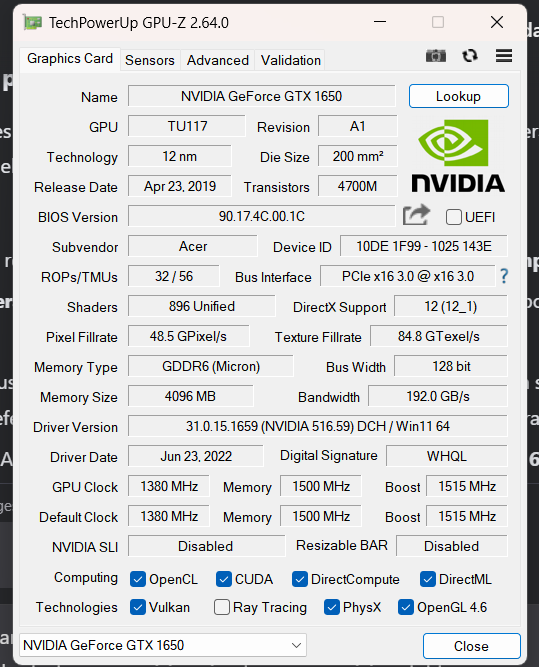

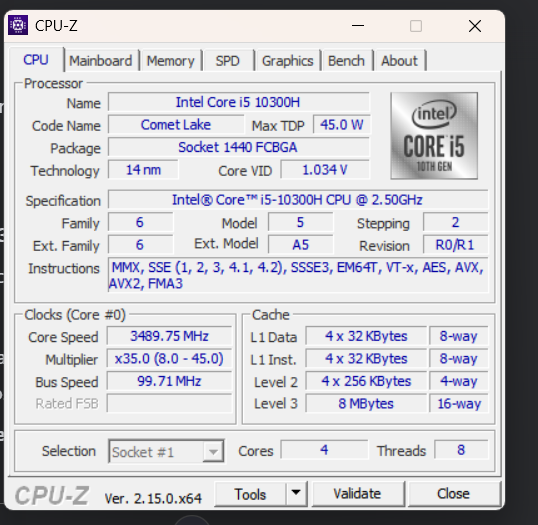

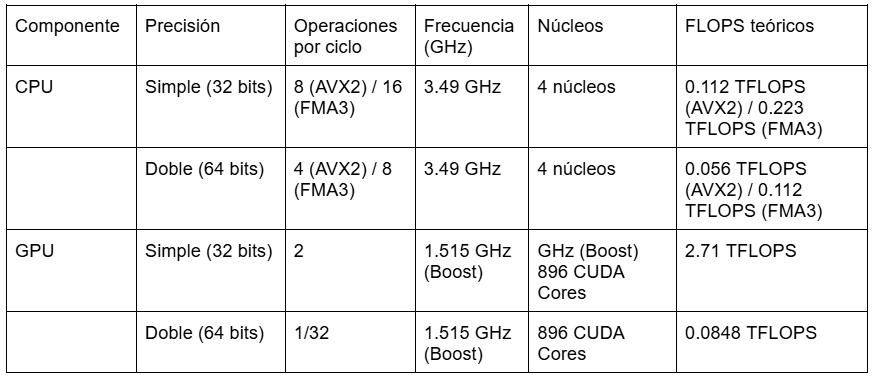

Cálculo para CPU usando LinpackXtreme para 64bits (precisión doble)

1. Rendimiento medido:

  El rendimiento promedio fue de 118.55 GFLOPS.

  El rendimiento máximo alcanzado fue de 123.87 GFLOPS.

2.  Comparación con el rendimiento teórico:
El rendimiento teórico en precisión doble (64 bits) para tu CPU es de 55.84 GFLOPS (AVX2) o 111.68 GFLOPS (FMA3).

  El rendimiento medido (118.55 GFLOPS) supera ligeramente el rendimiento teórico con FMA3 (111.68 GFLOPS).

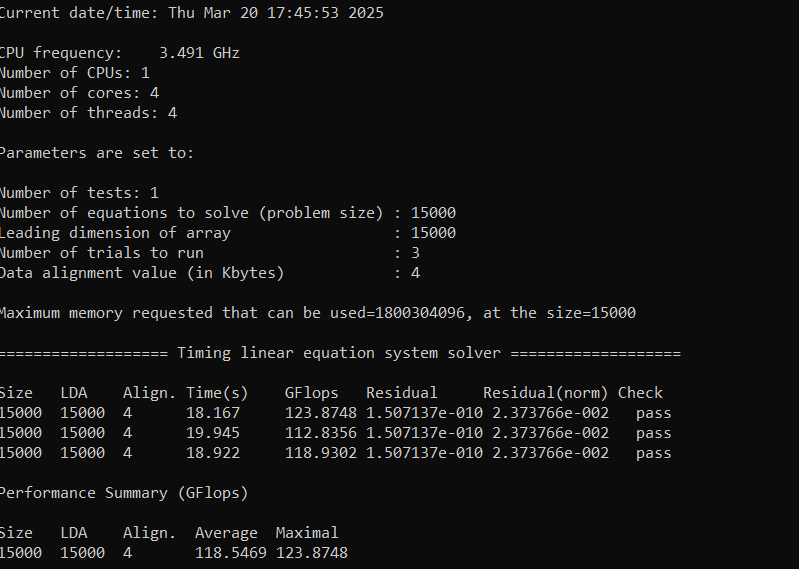

Cálculo para CPU usando LinpackXtreme para 32bits (precisión simple)